(0.7737284999056143, 3.855655523944971e-21)
NormaltestResult(statistic=2.5464749866768988, pvalue=0.27992390143577295)


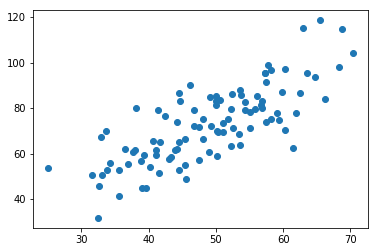

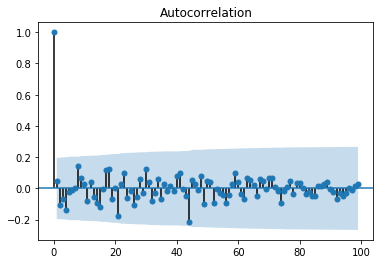

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.stats import normaltest
import statsmodels.api as sm


df = pd.read_csv("C:/Users/Vedant/Desktop/shortcuts/Practice/data.csv")
plt.scatter(df['x'],df['y'])
print(pearsonr(df['x'], df['y']))
print(normaltest(df['x']))
sm.graphics.tsa.plot_acf(df['y'])
plt.show()

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

X = df['x'].values.reshape(-1, 1)
y = df['y'].values.reshape(-1, 1)
train_X, test_X, train_y, test_y = train_test_split(X,
                                                   y,
                                                   test_size = 0.2,
                                                   random_state = 42)
model = LinearRegression()
model.fit(train_X, train_y)
preds = model.predict(test_X)
print('MSE ={0}'.format(mean_squared_error(test_y, preds)))
print('Mean abs error ={0}'.format(mean_absolute_error(test_y, preds)))

MSE =153.20927167201995
Mean abs error =10.079985942340153


# Identifying he Outliers and Removal Of The Outliers.

In [44]:
from pandas.api.types import is_numeric_dtype
def remove_outlier(df):
    low = .05
    high = .95
    quant_df = df.quantile([low, high])
    for name in list(df.y):
        if is_numeric_dtype(df['y']):
            df = df[(df['name'] > quant_df.loc[low, name])
                    & (df[name] < quant_df.loc[high, name])]
    return df
remove_outlier(df).head()

KeyError: 'name'